<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%8B%D0%B1%D1%8B%D1%82%D0%B8%D1%8F_%D1%81%D0%BE%D1%82%D1%80%D1%83%D0%B4%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                        ## Main Library
import pandas as pd                       ## Main Library
import matplotlib.pyplot as plt           ## Plotting Graphs
%matplotlib inline
from patsy import dmatrices                
import sklearn                            ## Used for Building model
import seaborn as sns                     ## Statistical plotting
import statsmodels.api as sm              ##Statistical Features
from scipy import stats
import warnings                           ## Remove warnings
warnings.filterwarnings("ignore")
from scipy.special import factorial

In [ ]:
dataframe=pd.read_csv("/content/archive (35).zip")

In [ ]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


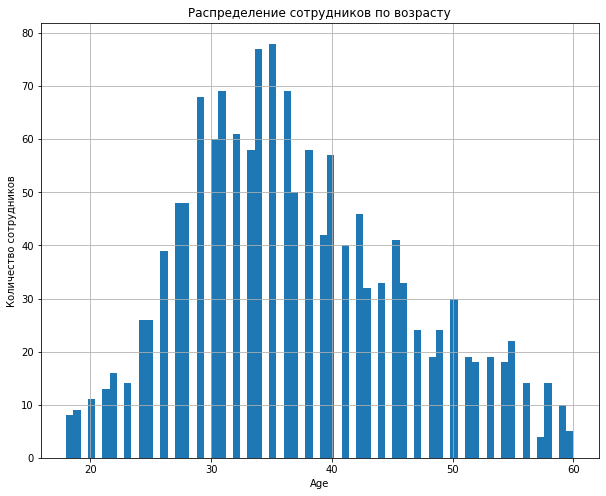

In [ ]:
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Распределение сотрудников по возрасту")
plt.xlabel("Age")
plt.ylabel("Количество сотрудников")
plt.show()

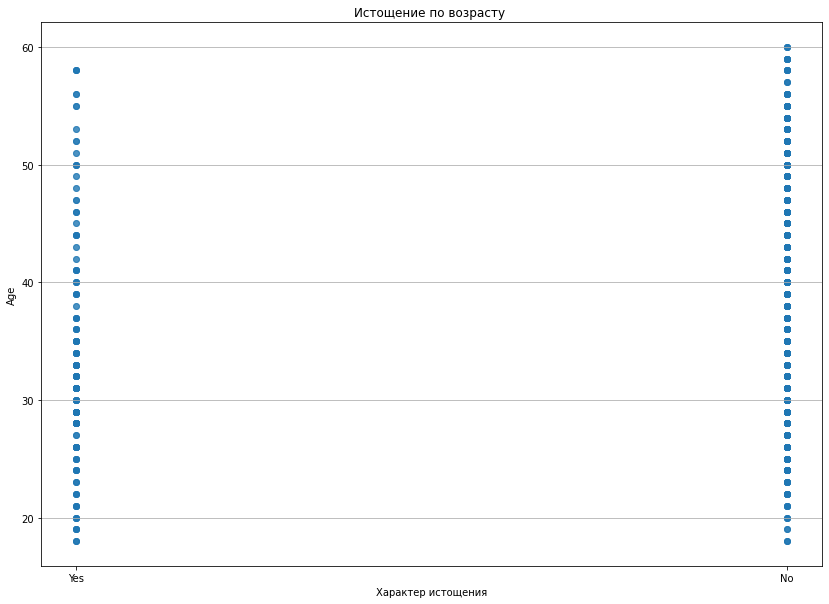

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
plt.title("Истощение по возрасту ")
plt.ylabel("Age")
plt.xlabel("Характер истощения")
plt.grid(b=True, which='major',axis='y')
plt.show()

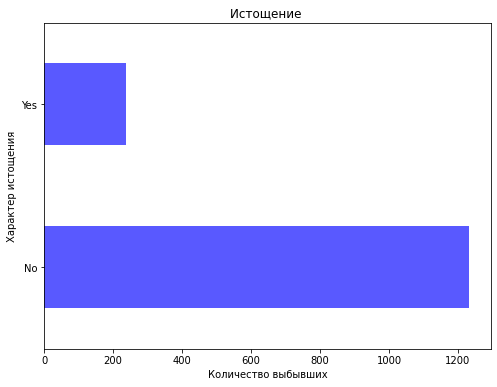

In [ ]:
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Истощение ")
plt.ylabel("Характер истощения")
plt.xlabel("Количество выбывших")
plt.show()

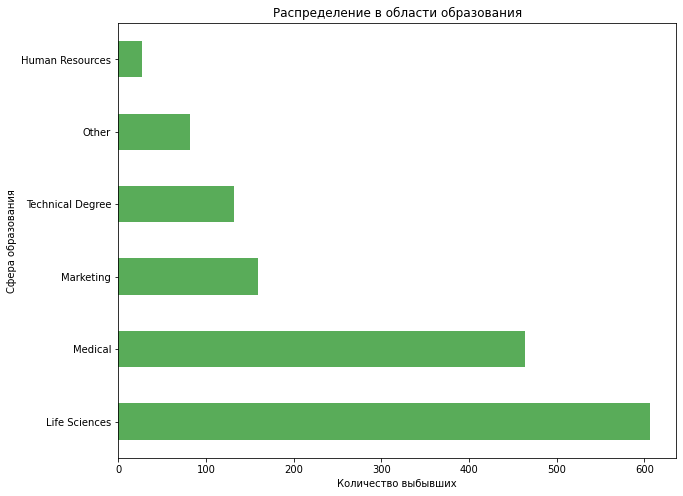

In [ ]:
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Распределение в области образования")
plt.ylabel("Сфера образования")
plt.xlabel("Количество выбывших")
plt.show()

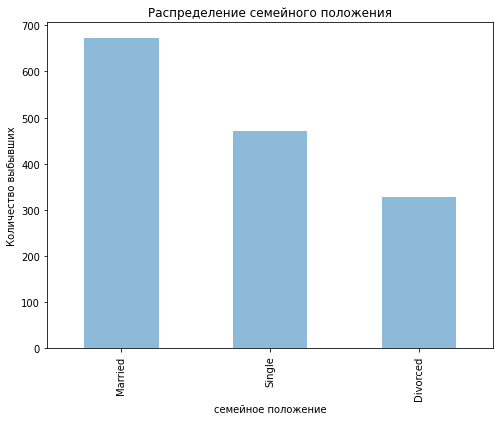

In [ ]:
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.title("Распределение семейного положения")
plt.ylabel("Количество выбывших")
plt.xlabel("семейное положение")
plt.show()

In [ ]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [ ]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)

In [ ]:
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


In [ ]:
dataframe.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309,-0.159205,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.017883,-0.027549,0.083919,-0.119185
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508,0.077924,-0.024499,0.039294,0.013486,-0.007969,-0.014802,-0.008117,0.014085,0.030232,-0.027445
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114,-0.031373,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.018604,0.014215,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458,-0.103369,-0.024526,0.000479,-0.021299,0.064602,0.027713,0.027976,-0.025606,-0.022180,0.009035
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803,-0.103481,0.052004,-0.023528,-0.022645,0.003380,-0.019795,-0.002798,0.013499,-0.010315,0.024571
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285,-0.159840,-0.007054,0.062576,0.001025,-0.022279,-0.049695,-0.064720,0.063978,0.056767,-0.089361
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421,0.043494,-0.006131,-0.018611,0.024826,-0.012870,-0.013819,0.022237,-0.032097,-0.016142,-0.019161
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089,-0.063939,-0.039728,0.018500,0.001641,0.031812,0.021962,-0.069922,0.051320,-0.006388,0.014921
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000,-0.134392,-0.002019,0.031365,0.010805,-0.030331,-0.021399,-0.032181,0.029805,0.044925,-0.070935
Attrition_Yes,-0.159205,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392,1.000000,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.085293,0.080855,-0.090984,0.175419


In [ ]:
y=dataframe['Attrition_Yes']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [ ]:
x = dataframe.loc[:, dataframe.columns != 'Attrition_Yes']
x.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,1,0,0,1,0,1,0


In [ ]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.60
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           8.80e-29
Time:                        15:09:01   Log-Likelihood:                -524.50
No. Observations:                1470   AIC:                             1087.
Df Residuals:                    1451   BIC:                             1188.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
X = dataframe[['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']]
X.head()

,Age,EnvironmentSatisfaction,MonthlyIncome,DistanceFromHome,NumCompaniesWorked,JobSatisfaction,MaritalStatus_Single,WorkLifeBalance
0,41,2,5993,1,8,4,1,1
1,49,3,5130,8,1,2,0,3
2,37,4,2090,2,6,3,1,3
3,33,4,2909,3,1,3,0,3
4,27,1,3468,2,9,2,0,3


In [ ]:
Y = dataframe['Attrition_Yes']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [ ]:
Plot = X.corr()
Plot

,Age,EnvironmentSatisfaction,MonthlyIncome,DistanceFromHome,NumCompaniesWorked,JobSatisfaction,MaritalStatus_Single,WorkLifeBalance
Age,1.000000,0.010146,0.497855,-0.001686,0.299635,-0.004892,-0.119185,-0.021490
EnvironmentSatisfaction,0.010146,1.000000,-0.006259,-0.016075,0.012594,-0.006784,0.009035,0.027627
MonthlyIncome,0.497855,-0.006259,1.000000,-0.017014,0.149515,-0.007157,-0.089361,0.030683
DistanceFromHome,-0.001686,-0.016075,-0.017014,1.000000,-0.029251,-0.003669,-0.027445,-0.026556
NumCompaniesWorked,0.299635,0.012594,0.149515,-0.029251,1.000000,-0.055699,-0.019161,-0.008366
JobSatisfaction,-0.004892,-0.006784,-0.007157,-0.003669,-0.055699,1.000000,0.024571,-0.019459
MaritalStatus_Single,-0.119185,0.009035,-0.089361,-0.027445,-0.019161,0.024571,1.000000,0.014921
WorkLifeBalance,-0.021490,0.027627,0.030683,-0.026556,-0.008366,-0.019459,0.014921,1.000000


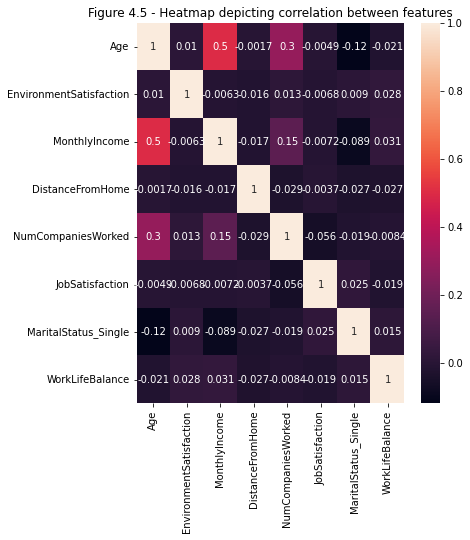

In [ ]:
plt.figure( figsize = (6,7) )
sns.heatmap(Plot, annot = True );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1029, 8)
(441, 8)
(1029,)
(441,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [ ]:
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("Coefficients of the Logistic regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef: ", coef)
print("Intercept: ", intercept)

Coefficients of the Logistic regression model
Coef:  [[-3.77857488e-02 -1.83324668e-01 -6.03793740e-05  4.43885329e-02
   1.18292452e-01 -2.06746430e-01  8.04970062e-01 -6.09564758e-02]]
Intercept:  [0.11292794]


In [ ]:
predicted_classes_lr = model_lr.predict(X_train)

Confusion Matrix for LR model::
[[864   4]
 [155   6]]


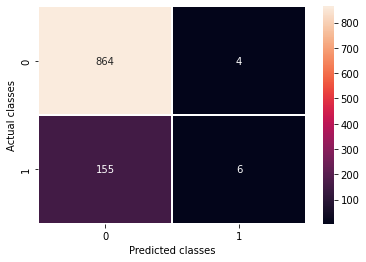

In [ ]:
print("Confusion Matrix for LR model::")
conf_mat_lr = confusion_matrix(Y_train.tolist(),predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr,annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [44]:
accuracy_lr = accuracy_score(Y_train,predicted_classes_lr)
print("accuracy score (train) for LR model::", accuracy_lr)

accuracy score (train) for LR model:: 0.8454810495626822


In [45]:
predicted_test_classes_lr = model_lr.predict(X_test)

In [46]:
print("Confusion Matrix (Test set) for LR model::")
conf_mat_test_lr = confusion_matrix(Y_test.tolist(),predicted_test_classes_lr)
print(conf_mat_test_lr)

Confusion Matrix (Test set) for LR model::
[[364   1]
 [ 74   2]]


In [47]:
accuracy_test_lr = accuracy_score(Y_test,predicted_test_classes_lr)
print("accuracy score - Log Reg (Test set)::", accuracy_test_lr)

accuracy score - Log Reg (Test set):: 0.8299319727891157


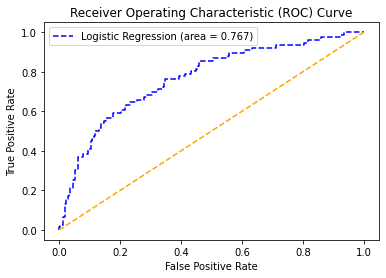

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()
logit_roc_auc = roc_auc_score(Y_test, model_lr.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1], drop_intermediate=False)
#, drop_intermediate=False
plt.plot(fpr, tpr, 'b--', label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()